In [8]:
import os
import torch
import pandas as pd
from skimage import io
from sklearn.preprocessing import LabelEncoder
from PIL import Image

In [62]:
irma_classmap = LabelEncoder().fit(['BI-RADS I', 'BI-RADS II', 'BI-RADS III', 'BI-RADS IV'])

In [2]:
def _read_metadata(root_dir, metadata_file):
    files_metadatas = []

    with open(root_dir+metadata_file, 'r') as paths:
        next_path = paths.readline()

        while next_path:
            label = paths.readline()
            next_path, label = next_path[:-1], int(label[:-1]) # remove '\n'

            img_name = os.path.join(root_dir, next_path + '.png')
            image = io.imread(img_name)

            
            files_metadatas.append((image, img_name, label))

            next_path = paths.readline()

    return pd.DataFrame(files_metadatas, columns=['image', 'im_path', 'label'])


In [4]:
dataset_df = _read_metadata('./datasets/IRMA/', 'featureS.txt')
dataset_df

,image,im_path,label
0,"[[91, 86, 83, 79, 77, 82, 84, 82, 81, 79, 75, ...",./datasets/IRMA/p_d_left_cc(10).png,0
1,"[[184, 183, 183, 186, 187, 189, 187, 184, 180,...",./datasets/IRMA/p_d_left_cc(100).png,0
2,"[[136, 136, 136, 133, 132, 130, 129, 130, 130,...",./datasets/IRMA/p_d_left_cc(101).png,0
3,"[[161, 161, 163, 164, 163, 162, 162, 160, 161,...",./datasets/IRMA/p_d_left_cc(102).png,0
4,"[[186, 189, 189, 188, 189, 189, 188, 188, 185,...",./datasets/IRMA/p_d_left_cc(103).png,0
...,...,...,...
5019,"[[180, 178, 181, 185, 187, 186, 188, 189, 192,...",./datasets/IRMA/p_g_right_mlo(96).png,3
5020,"[[194, 194, 197, 199, 202, 203, 204, 204, 202,...",./datasets/IRMA/p_g_right_mlo(97).png,3
5021,"[[221, 221, 222, 219, 221, 222, 222, 222, 221,...",./datasets/IRMA/p_g_right_mlo(98).png,3
5022,"[[230, 229, 229, 228, 229, 228, 228, 228, 228,...",./datasets/IRMA/p_g_right_mlo(99).png,3


In [44]:
def get_image(idx, df):
    if torch.is_tensor(idx):
        idx = idx.tolist()

    label = df.iloc[idx, 2]
    
    path = df.iloc[idx, 1]

    image = df.iloc[idx, 0]

    return image, path, label

i:0	path: ./datasets/IRMA/p_d_left_cc(10).png	label: 0


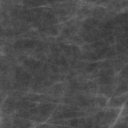

i:1	path: ./datasets/IRMA/p_d_left_cc(100).png	label: 0


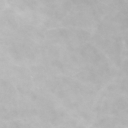

i:2	path: ./datasets/IRMA/p_d_left_cc(101).png	label: 0


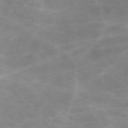

i:3	path: ./datasets/IRMA/p_d_left_cc(102).png	label: 0


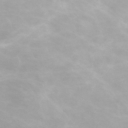

i:4	path: ./datasets/IRMA/p_d_left_cc(103).png	label: 0


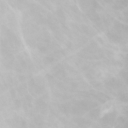

i:5	path: ./datasets/IRMA/p_d_left_cc(104).png	label: 0


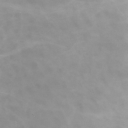

i:6	path: ./datasets/IRMA/p_d_left_cc(105).png	label: 0


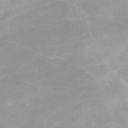

i:7	path: ./datasets/IRMA/p_d_left_cc(106).png	label: 0


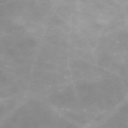

i:8	path: ./datasets/IRMA/p_d_left_cc(107).png	label: 0


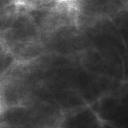

i:9	path: ./datasets/IRMA/p_d_left_cc(108).png	label: 0


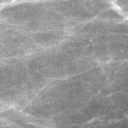

In [53]:
max_n = 10
n = 0

for i in dataset_df[dataset_df.label == 0].iterrows():
    image, path, label = get_image(i[0], dataset_df)
    print(f'i:{i[0]}\tpath: {path}\tlabel: {label}')

    display(Image.fromarray(image))

    n+=1
    if n >= max_n: break

i:1256	path: ./datasets/IRMA/p_e_left_cc(10).png	label: 1


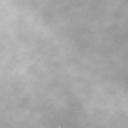

i:1257	path: ./datasets/IRMA/p_e_left_cc(100).png	label: 1


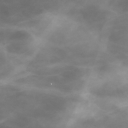

i:1258	path: ./datasets/IRMA/p_e_left_cc(101).png	label: 1


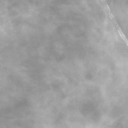

i:1259	path: ./datasets/IRMA/p_e_left_cc(102).png	label: 1


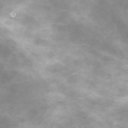

i:1260	path: ./datasets/IRMA/p_e_left_cc(103).png	label: 1


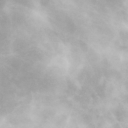

i:1261	path: ./datasets/IRMA/p_e_left_cc(104).png	label: 1


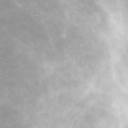

i:1262	path: ./datasets/IRMA/p_e_left_cc(105).png	label: 1


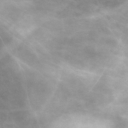

i:1263	path: ./datasets/IRMA/p_e_left_cc(106).png	label: 1


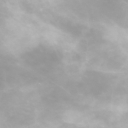

i:1264	path: ./datasets/IRMA/p_e_left_cc(107).png	label: 1


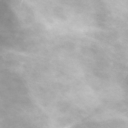

i:1265	path: ./datasets/IRMA/p_e_left_cc(108).png	label: 1


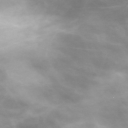

i:1266	path: ./datasets/IRMA/p_e_left_cc(109).png	label: 1


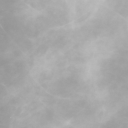

i:1267	path: ./datasets/IRMA/p_e_left_cc(11).png	label: 1


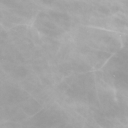

i:1268	path: ./datasets/IRMA/p_e_left_cc(110).png	label: 1


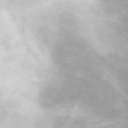

i:1269	path: ./datasets/IRMA/p_e_left_cc(111).png	label: 1


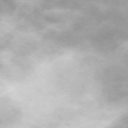

i:1270	path: ./datasets/IRMA/p_e_left_cc(112).png	label: 1


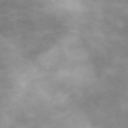

i:1271	path: ./datasets/IRMA/p_e_left_cc(113).png	label: 1


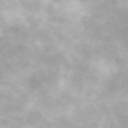

i:1272	path: ./datasets/IRMA/p_e_left_cc(114).png	label: 1


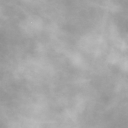

i:1273	path: ./datasets/IRMA/p_e_left_cc(115).png	label: 1


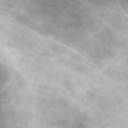

i:1274	path: ./datasets/IRMA/p_e_left_cc(116).png	label: 1


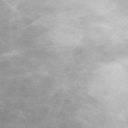

i:1275	path: ./datasets/IRMA/p_e_left_cc(117).png	label: 1


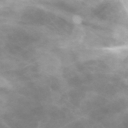

In [57]:
max_n = 20
n = 0

for i in dataset_df[dataset_df.label == 1].iterrows():
    image, path, label = get_image(i[0], dataset_df)
    print(f'i:{i[0]}\tpath: {path}\tlabel: {label}')

    display(Image.fromarray(image))

    n+=1
    if n >= max_n: break

i:2512	path: ./datasets/IRMA/p_f_left_cc(10).png	label: 2


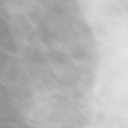

i:2513	path: ./datasets/IRMA/p_f_left_cc(100).png	label: 2


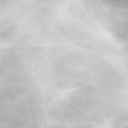

i:2514	path: ./datasets/IRMA/p_f_left_cc(101).png	label: 2


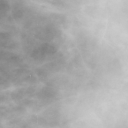

i:2515	path: ./datasets/IRMA/p_f_left_cc(102).png	label: 2


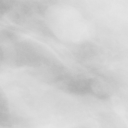

i:2516	path: ./datasets/IRMA/p_f_left_cc(103).png	label: 2


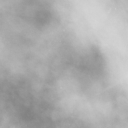

i:2517	path: ./datasets/IRMA/p_f_left_cc(104).png	label: 2


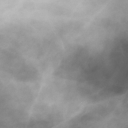

i:2518	path: ./datasets/IRMA/p_f_left_cc(105).png	label: 2


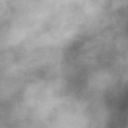

i:2519	path: ./datasets/IRMA/p_f_left_cc(106).png	label: 2


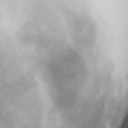

i:2520	path: ./datasets/IRMA/p_f_left_cc(107).png	label: 2


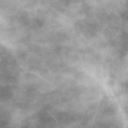

i:2521	path: ./datasets/IRMA/p_f_left_cc(108).png	label: 2


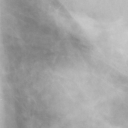

In [55]:
max_n = 10
n = 0

for i in dataset_df[dataset_df.label == 2].iterrows():
    image, path, label = get_image(i[0], dataset_df)
    print(f'i:{i[0]}\tpath: {path}\tlabel: {label}')

    display(Image.fromarray(image))

    n+=1
    if n >= max_n: break

i:3768	path: ./datasets/IRMA/p_g_left_cc(10).png	label: 3


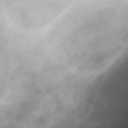

i:3769	path: ./datasets/IRMA/p_g_left_cc(100).png	label: 3


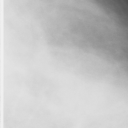

i:3770	path: ./datasets/IRMA/p_g_left_cc(101).png	label: 3


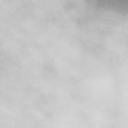

i:3771	path: ./datasets/IRMA/p_g_left_cc(102).png	label: 3


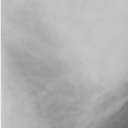

i:3772	path: ./datasets/IRMA/p_g_left_cc(103).png	label: 3


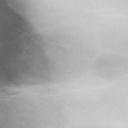

i:3773	path: ./datasets/IRMA/p_g_left_cc(104).png	label: 3


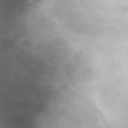

i:3774	path: ./datasets/IRMA/p_g_left_cc(105).png	label: 3


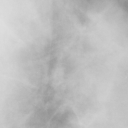

i:3775	path: ./datasets/IRMA/p_g_left_cc(106).png	label: 3


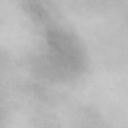

i:3776	path: ./datasets/IRMA/p_g_left_cc(107).png	label: 3


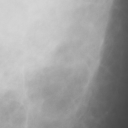

i:3777	path: ./datasets/IRMA/p_g_left_cc(108).png	label: 3


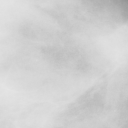

In [56]:
max_n = 10
n = 0

for i in dataset_df[dataset_df.label == 3].iterrows():
    image, path, label = get_image(i[0], dataset_df)
    print(f'i:{i[0]}\tpath: {path}\tlabel: {label}')

    display(Image.fromarray(image))

    n+=1
    if n >= max_n: break

In [67]:
typical = [0, 1259, 2519, 3776]
atypical = [1, 1269, 2515, 3773]

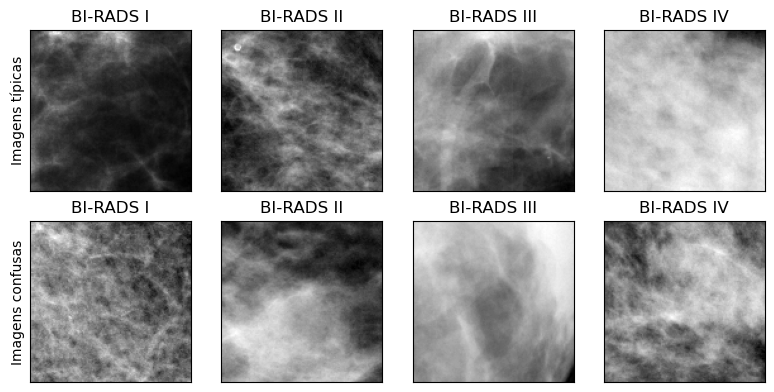

In [85]:
import matplotlib.pyplot as plt

typical = [8, 1259, 2600, 3770]
atypical = [1, 1269, 2519, 3840]

fig, axes = plt.subplots(2, 4, figsize=(8, 4))  # Create subplots for individual images
ds_name = ['Imagens típicas', 'Imagens confusas']

for j, samples in enumerate([typical, atypical]):
    for i, ds_i in enumerate(samples):
        im, _, l = get_image(ds_i, dataset_df)
        label = irma_classmap.inverse_transform([l])
        # im = im.permute(1, 2, 0)

        plot_borders = im.shape[-1] == 2

        if plot_borders:
            image = im[:, :, :-1]
            border = im[:, :, -1]
        else:
            image = im
            
        if plot_borders:
            combined_image = np.concatenate((image.flatten(1), border), axis=1)
            axes[j, i].imshow(combined_image, cmap='gray')  # Apply cmap
        else:
            axes[j, i].imshow(image, cmap='gray')  # Apply cmap

        if i == 0:
            axes[j, i].set_ylabel(ds_name[j])

        axes[j, i].set_yticks([])
        axes[j, i].set_xticks([])
        axes[j, i].set_title(str(label[0]))  # Set label as title for each image

# fig.suptitle(f'Grid of {n} Images with Labels', fontsize=16)  # Add overall title
plt.tight_layout()
plt.show()